As a consultant for Olist (online solution for marketplaces),
we are commissioned to segment their client database. <br>
The goal is to establish a base for their communication campaigns. <br> 
They also require a maintenance contract based on a stability analysis of the different segments over time.

pd.show_versions() <br>
pandas version : 1.0.5 <br>
numpy version : 1.18.5 <br>
seaborn version : 0.11.2 <br>
matplotlib version : 3.2.2 <br>

This is the tryout notebook where I put to the test different clustering algorithms : <br>

Usual loadings <br>
Part 1 - <a href='#Oper'> Operations on a dataframe <br>
$\;\;\;\;\;\;$ <a href='#apply'> Apply function on the dataframe <br>
Part 2 - <a href='#create'> Creating the different time selected datafram <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#appdf'> Apply on dfs </a> <br>
<a href='#reload'> Reloading </a> <br>
Part 3 - <a href='#transfo'> Transforming functions </a> <br>
$\;\;\;\;\;\;$ <a href='#df0'> 1 year, 4 months and 10 days <br>
$\;\;\;\;\;\;$ <a href='#df1'> t0 + 1 month <br>
$\;\;\;\;\;\;$ <a href='#df2'> t0 + 3 months <br>
$\;\;\;\;\;\;$ <a href='#df3'> t0 + 6 months <br>
Part 4 - <a href='#ari'> Ari Score </a>

#### Usual imports and options

In [1]:
#pip install plotly==5.4.0 # for plotly.express

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from math import * #for ceil()

In [59]:
import plotly.graph_objects as go

In [3]:
# col width
pd.set_option('max_colwidth', 120)
# option to be able see all columns
pd.set_option('max_columns', None)
# max lanes display
pd.options.display.max_rows = 5000

In [4]:
import time
from datetime import date, datetime

In [5]:
from sklearn.cluster import KMeans
from sklearn import cluster, metrics
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN

In [8]:
start = time.time()
dorder = pd.read_csv('dorder_clean_pre_fe.csv')
dorder.drop(['Unnamed: 0'], axis = 1, inplace=True)
#dorder.drop(['Unnamed: 70'], axis = 1, inplace=True)
end = time.time()
print("total time: ",(end - start),"sec")

total time:  1.2547204494476318 sec


In [9]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

In [10]:
# Transformers
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [11]:
from sklearn import decomposition
from sklearn.decomposition import PCA
from functions import *

In [12]:
from sklearn.cluster import KMeans
from sklearn import cluster, metrics
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN

In [13]:
#pip install yellowbrick # for Yellobrick visualisations

In [14]:
# Visualisation

from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, intercluster_distance

In [15]:
#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

std_scale = preprocessing.StandardScaler()

In [120]:
from sklearn.metrics.cluster import adjusted_rand_score

#### fonctions

In [208]:
def polarplt(df, cluster_column, selection) :
    # selection are the criteria represented in the polar plot

    fig = go.Figure()
    
    names = []    
    mean_Number_of_orders = []
    selected = list(df)
    clusters_uniq = df[cluster_column].unique()

    for i in range(len(clusters_uniq)) :
        names.append('cluster' + ' ' + str(clusters_uniq[i]))
        means_c = []
        Mean_cluster = df[df[cluster_column].isin([clusters_uniq[i]])]
        for y in range(len(selection)) :
            a = Mean_cluster[selection[y]]
            norma = ((a - min(a)) / (max(a) - min(a)))
            norma = a / max(a)
            meana = norma.mean()
            means_c.append(norma.mean())
    
        fig.add_trace(go.Scatterpolar(r=means_c, theta=selected, name=names[i]))
    
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )
    fig.show()

In [16]:
#pip install bioinfokit

In [17]:
# Boxplot function + ANNOVA + STATS (p value for the whole and 2 by 2)
# df : name of the dataframe
# x is the name of the qualitative column (example : 'category')
# y is the name of the quantitative column (example : 'value')
# Tukey = 1 (stats 2 by 2)
# showfliers on/off ; sort = 1 : sort the resulting boxplot

def boxplots(df, x, y, tukey=1, size=(8,6), showfliers=False, sort = 0, font=50) :

    dfnona = df[df[y].notna()]
    X = x # qualitative
    Y = y # quantitative

    if sort == 1 :
        modalites = sorted(dfnona[X].unique(), reverse=False)
    elif sort == 2 :
        modalites = sorted(dfnona[X].unique(), reverse=True)
    else :
        modalites = dfnona[X].unique()
        
    groupes = []
    for m in modalites:
        groupes.append(dfnona[dfnona[X]==m][Y])

    # Propriétés graphiques (pas très importantes)    
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}

    fig, ax = plt.subplots(figsize=size)
    ax.set_title(str(x)+' / '+str(y), fontsize=16)
    ax.set_xlabel(y, fontsize=14)
    ax.set_ylabel(x, fontsize=14) 
    # medianpropsdict, default: None / The style of the median
    # meanpropsdict, default: None / The style of the mean
    # vertbool, default: True / If True, draws vertical boxes. If False, draw horizontal boxes.
    # patch_artistbool, default: False / If False produces boxes with the Line2D artist. Otherwise, with Patch artists.
    plt.boxplot(
        groupes,
        labels=modalites,
        showfliers=showfliers,
        medianprops=medianprops,
        vert=False,
        patch_artist=True,
        showmeans=True,
        meanprops=meanprops
    )
    plt.show()
    plt.rcParams.update({"font.size" : font})   
    
    df2 = df.melt(id_vars=[X], value_vars=[Y])
    df2.columns = ['catquali', 'attribut', 'value']
    
    # Ordinary Least Squares (OLS) model
    modelanova = ols('value ~ C(catquali)', data=df2).fit()
    anova_table = sm.stats.anova_lm(modelanova, typ=2)
    print(anova_table)
    
    # we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
    # #pip install bioinfokit
    # check documentation here https://github.com/reneshbedre/bioinfokit
    # perform multiple pairwise comparison (Tukey's HSD)
    # unequal sample size data, tukey_hsd uses Tukey-Kramer test
    if tukey == 1 :
        res = stat()
        res.tukey_hsd(df=df2, res_var='value', xfac_var='catquali', anova_model='value ~ C(catquali)')
        print(res.tukey_summary)

In [19]:
# fig  + linear regression
from sklearn import linear_model

def quantiquanti(df, cat1, cat2, regl = 0, co = 0) :
    
    X = cat1
    Y = cat2
    Z = df[[X, Y]].copy().dropna()

    reg = linear_model.LinearRegression()
    reg.fit(Z[[X]], Z[Y])
    rez = reg.predict(Z[[X]])
    
    if co == 1 :
        # Coefficient
        print('Coefficients: \n', reg.coef_)
        # The mean squared error
        print('Mean squared error: %.2f'
          % mean_squared_error(Z[X], Z[Y]))
        # Coefficient de détermination: 1 est la prédiction parfaite
        print('Coefficient of determination: %.2f'
          % r2_score(Z[X], Z[Y]))
    
    plt.scatter(Z[X], Z[Y],  color='blue')
    
    if regl == 1 :
        plt.plot(Z[X], rez, color='red', linewidth=1)
    
    plt.xlabel(X)
    plt.ylabel(Y)

    plt.show()

<a id='Oper' />

# Part 1 - Operation on a dataframe

In [17]:
#from datetime to number of days

def trans_datetime(df) :

    startt = time.time()

    for i in range(df.shape[0]) :
        time_in_sec_from_Jan_1970 = datetime.timestamp(datetime.strptime(df.loc[i, 'order_purchase_timestamp'], "%Y-%m-%d %X"))
        time_in_sec_from_Jan_2016 = (time_in_sec_from_Jan_1970 - ((60 * 60 * 24)) * (35*(365)+11*(366))) #to avoid any loss of info (check the number of diggits)
        time_in_days_from_Jan_2016 = (time_in_sec_from_Jan_1970 / (60 * 60 * 24)) - (35*(365)+11*(366))
        df.loc[i, 'Time_of_purchase'] = time_in_days_from_Jan_2016
        df.loc[i, 'Time_of_purchase_sec'] = time_in_sec_from_Jan_2016

    endt = time.time()
    print("total time: ",(endt - startt),"sec")

In [18]:
def numb_first_last_rec_freq(df, lastnum_year_2016) :
    startt = time.time()

    unicusto = df['customer_unique_id'].unique()

    df['Number_of_orders'] = 1
    df['First_order_time'] = 1
    df['Last_order_time'] = 1
    df['Recency'] = 1
    df['Frequency'] = 1

    for i in range(len(unicusto)) :
        coco = df[df['customer_unique_id'].isin([unicusto[i]])]
        lastcoco = max(coco['Time_of_purchase_sec'])
        firstcoco = min(coco['Time_of_purchase_sec'])
        indexcoco = coco.index.tolist()
        numb = len(coco['order_id'].unique())
    
        df['Number_of_orders'].loc[indexcoco] = numb
        df['First_order_time'].loc[indexcoco] = firstcoco
        df['Last_order_time'].loc[indexcoco] = lastcoco
        df['Recency'].loc[indexcoco] = (((lastnum_year_2016 * 24 * 60 *60) - lastcoco) / 60 / 60 / 24)
        if lastcoco != firstcoco :
            # in sec
            bob = (df.loc[[indexcoco][0]]['Number_of_orders']/((lastcoco - firstcoco)**(1/4)))
            df['Frequency'].loc[indexcoco] = bob
        
    endt = time.time()
    print("total time: ",(endt - startt),"sec")

In [19]:
def total_money_for_one_order(df) :

    # Total money spent for one order
    start = time.time()

    base = df['order_id'].unique() # Selection of all the unique order ids

    df['total_payment_value'] = df['payment_value']

    order_spending = df.copy()[[
        'order_id', 'order_item_id', 'price', 'freight_value', 'payment_sequential',
        'payment_installments']]

    for i in range(len(base)) :
        unique_order_id = order_spending['order_id'].isin([base[i]])
        echanti = order_spending[unique_order_id] # selecting one unique order_id
    
        echantindex = echanti.index.tolist() # Stroring the indexes to attribute later calculated values
    
        payment_seq = echanti[echanti['payment_sequential'] == 1] # Removing the multiple payment installements
    
        payment_seq.drop_duplicates() # Droping the multiple reviews
    
        total = payment_seq['price'].sum() + payment_seq['freight_value'].sum()
    
        df['total_payment_value'].loc[echantindex] = total
        
    end = time.time()
    print("total time: ",(end - start),"sec")

In [20]:
def total_spent_by_a_customer(df) :

    #Total value of all the payments for one customer
    start = time.time()

    df['tot_customer_spending'] = df['total_payment_value']

    basec = df['customer_unique_id'].unique()

    for i in range(len(basec)) :
        echantc = df[df['customer_unique_id'].isin([basec[i]])]
        zuap = echantc['order_id'].unique()
        if len(zuap) > 1 :
            tota = 0
            echantv = echantc.index.tolist()
            zuap = echantc['order_id'].unique()
            for i in range(len(zuap)) :
                tota = tota + echantc[echantc['order_id'].isin([zuap[i]])]['total_payment_value'].iloc[0]
            df['tot_customer_spending'].loc[echantv] = tota
                
    end = time.time()
    print("total time: ",(end - start),"sec")

In [21]:
def mean_review_for_an_order(df) :
    start = time.time()

    #df.insert(13, 'mean_review_score', df['review_score'].copy())
    df['mean_review_score'] = df['review_score'].copy()

    choci = df.dropna(subset=['review_id'])    # removing the Nan
    choco = choci['order_id'].unique()

    for i in range(len(choco)) :
        revlist = df[df['order_id'].isin([choco[i]])]
        revuni = revlist['review_id'].unique()
        if len(revuni) > 1 :
            note = 0
            revindex = revlist.index.tolist()
            for i in range(len(revuni)) :
                note = note + revlist[revlist['review_id'].isin([revuni[i]])]['review_score'].iloc[0]
            df['mean_review_score'].loc[revindex] = note / len(revuni)
                
    end = time.time()
    print("total time: ",(end - start),"sec")

In [22]:
def mean_review_for_one_customer(df) :
    start = time.time()

    df['Cus_mean_review_score'] = df['review_score']
    cuz = df.dropna(subset=['Cus_mean_review_score'])    # removing the na()

    unicusty = cuz['customer_unique_id'].unique()

    for i in range(len(unicusty)) :
        coco = cuz[cuz['customer_unique_id'].isin([unicusty[i]])]    # selecting one unique customer
        nb_order = coco['order_id'].unique()
        mean_sco = 0
        if len(nb_order) > 1 :
            indexcoco = coco.index.tolist()   # selecting the index related to this specific customer
            for i in range(len(nb_order)) :
                mean_sco = mean_sco + coco[coco['order_id'].isin([nb_order[i]])]['review_score'].iloc[0]
            df['Cus_mean_review_score'].loc[indexcoco] =  mean_sco / len(nb_order)
    
    end = time.time()
    print("total time: ",(end - start),"sec")

In [23]:
def delivery_time(df) :

    # df.insert(24, 'order_delivered_time', np.nan)
    # df.insert(26, 'order_estimated_delivery', np.nan)
    df['order_delivered_time'] = np.nan
    df['order_estimated_delivery'] = np.nan

    #from datetime to number of days
    startt = time.time()

    for i in range(df.shape[0]) :
        if (df.loc[i, 'order_delivered_customer_date'] == df.loc[i, 'order_delivered_customer_date']) :
            delivered_in_sec_from_Jan_1970 = datetime.timestamp(datetime.strptime(df.loc[i, 'order_delivered_customer_date'],
                                                                          "%Y-%m-%d %X"))    
            delivered_in_days_from_Jan_2016 = (delivered_in_sec_from_Jan_1970 / (60 * 60 * 24)) - (35*(365)+11*(366))
            df.loc[i, 'order_delivered_time'] = delivered_in_days_from_Jan_2016
    
        if (df.loc[i, 'order_estimated_delivery_date'] == df.loc[i, 'order_estimated_delivery_date']) :
            estimated_in_sec_from_Jan_1970 = datetime.timestamp(datetime.strptime(df.loc[i, 'order_estimated_delivery_date'],
                                                                          "%Y-%m-%d %X"))
            estimated_in_days_from_Jan_2016 = (estimated_in_sec_from_Jan_1970 / (60 * 60 * 24)) - (35*(365)+11*(366))
            df.loc[i, 'order_estimated_delivery'] = estimated_in_days_from_Jan_2016

    endt = time.time()
    print("total time: ",(endt - startt),"sec")

In [24]:
def delay(df) :

    #delay between the estimated time and the delivered time
    # df.insert(27, 'delay_delivery', np.nan)
    df['delay_delivery'] = np.nan

    startt = time.time()

    condd = 1
    condition = [(condd == 1)]

    choice = [df['order_estimated_delivery'] - df['order_delivered_time']] 

    df['delay_delivery'] = np.select(condlist= condition, choicelist=choice, default = df['delay_delivery'])
          
    endt = time.time()
    print("total time: ",(endt - startt),"sec")

In [25]:
def distance(df) :

    #distance between buyer and seller
    #df.insert(28, 'distance', np.nan)
    df['distance'] = np.nan

    startt = time.time()

    condd = 1
    condition = [(condd == 1)]

    choice = [np.sqrt(np.absolute(np.square(df['geo_mlng_customer'] - df['geo_mlng_seller']) 
                                  + (df['geo_mlat_customer'] - df['geo_mlat_seller'])))] 

    df['distance'] = np.select(condlist= condition, choicelist=choice, default = df['distance'])
          
    endt = time.time()
    print("total time: ",(endt - startt),"sec")

In [26]:
def afining_the_catstartt(df) :

    startt = time.time()

    bol = 'categories'
    df[bol] = df['product_category_name_english']

    condition = [(df[bol] == 'cds_dvds_musicals') | (df[bol] == 'arts_and_craftmanship') 
                 | (df[bol] == 'flowers') | (df[bol] == 'music') | (df[bol] == 'books_imported') 
                 | (df[bol] == 'dvds_blu_ray') | (df[bol] == 'cine_photo') 
                 | (df[bol] == 'tablets_printing_image') | (df[bol] == 'art') | (df[bol] == 'fixed_telephony') 
                 | (df[bol] == 'books_technical') | (df[bol] == 'audio') 
                 | (df[bol] == 'books_general_interest') | (df[bol] == 'musical_instruments') 
                 | (df[bol] == 'telephony'),
             
                 (df[bol] == 'costruction_tools_tools') | (df[bol] == 'construction_tools_safety') 
                 | (df[bol] == 'costruction_tools_garden') | (df[bol] == 'agro_industry_and_commerce') 
                 | (df[bol] == 'industry_commerce_and_business') | (df[bol] == 'air_conditioning') 
                 | (df[bol] == 'construction_tools_lights') | (df[bol] == 'market_place') 
                 | (df[bol] == 'home_construction') | (df[bol] == 'construction_tools_construction') 
                 | (df[bol] == 'office_furniture') | (df[bol] == 'stationery'),
             
                 (df[bol] == 'security_and_services') | (df[bol] == 'signaling_and_security') 
                 | (df[bol] == 'computers') | (df[bol] == 'computers_accessories'),
             
                 (df[bol] == 'fashion_childrens_clothes') | (df[bol] == 'fashion_sport') 
                 | (df[bol] == 'diapers_and_hygiene') | (df[bol] == 'fashio_female_clothing') 
                 | (df[bol] == 'fashion_male_clothing') | (df[bol] == 'fashion_underwear_beach') 
                 | (df[bol] == 'fashion_shoes') | (df[bol] == 'luggage_accessories') 
                 | (df[bol] == 'fashion_bags_accessories') 
                 | (df[bol] == 'baby'),
             
                 (df[bol] == 'party_supplies') | (df[bol] == 'christmas_supplies') | (df[bol] == 'consoles_games') 
                 | (df[bol] == 'toys') | (df[bol] == 'watches_gifts'),
             
                 (df[bol] == 'la_cuisine') | (df[bol] == 'home_comfort_2') 
                 | (df[bol] == 'furniture_mattress_and_upholstery') 
                 | (df[bol] == 'small_appliances_home_oven_and_coffee') | (df[bol] == 'furniture_bedroom') 
                 | (df[bol] == 'home_appliances_2') | (df[bol] == 'kitchen_dining_laundry_garden_furniture') 
                 | (df[bol] == 'furniture_living_room') | (df[bol] == 'small_appliances') 
                 | (df[bol] == 'home_appliances') | (df[bol] == 'garden_tools') | (df[bol] == 'housewares') 
                 | (df[bol] == 'furniture_decor') | (df[bol] == 'bed_bath_table'),
             
                 (df[bol] == 'food_drink') | (df[bol] == 'drinks') | (df[bol] == 'food') 
                 | (df[bol] == 'perfumery') | (df[bol] == 'sports_leisure')                  
    ]

    choice = ['arts_video_audio', 'industry_commerce_construction',
              'electronics', 'clothing_and_bags', 
              'cool_stuff', 'home_confort',
              'health_beauty'    
    ] 

    df['categories'] = np.select(condlist= condition, choicelist=choice, default = df['categories'])
          
    endt = time.time()
    print("total time: ",(endt - startt),"sec")

In [27]:
def number_of_articles(df) :
    startt = time.time()

    df['Number_of_articles'] = 1

    unicusto = dorder['customer_unique_id'].unique()

    for i in range(len(unicusto)) :
        sumnumber = 0
        coco = df[df['customer_unique_id'].isin([unicusto[i]])]
        indexcoco = coco.index.tolist()
        oneorder = coco['order_id'].unique()
        for y in range(len(oneorder)) :
            bibalo = coco[coco['order_id'].isin([oneorder[y]])]
            number_of_articles = max(bibalo['order_item_id'])
            sumnumber = sumnumber + number_of_articles
        df['Number_of_articles'].loc[indexcoco] = sumnumber
        
    endt = time.time()
    print("total time: ",(endt - startt),"sec")

In [28]:
# Categories for one client, I can maybe one hot encod by hand and fill it for each customers
def most_used_and_spent(df) :

    startt = time.time()

    df['Most_used_method_of_payment'] = 1
    df['Method_used_to_spend_the_most'] = 1

    payment_type = ['credit_card', 'boleto', 'voucher', 'debit_card']

    unicusto = df['customer_unique_id'].unique()

    for i in range(len(unicusto)) :
        coco = df[df['customer_unique_id'].isin([unicusto[i]])] #select one customer
        indexcoco = coco.index.tolist() # retrieve the index
        single_methods = coco[coco['order_item_id'] == 1] # Remove the order_item above 1
        payment_count = []
        payment_value = []
    
        for y in range(len(payment_type)) :
            payment_count.append(len(single_methods[single_methods['payment_type'] == payment_type[y]]))
            payment_value.append(single_methods[single_methods['payment_type'] == payment_type[y]]['payment_value'].sum())
        
        max_count = max(payment_count)
        max_value = max(payment_value)
    
        for u in range(len(payment_type)) :
            if payment_count[u] == max_count :
                df['Most_used_method_of_payment'].loc[indexcoco] = payment_type[u]
                break
            
        for v in range(len(payment_type)) :
                if payment_value[v] == max_value :
                    df['Method_used_to_spend_the_most'].loc[indexcoco] = payment_type[v]
                    break
    
        # Version to create a new cat or a non cat where 2 methods are equivelent
    #     if max_count > sorted(payment_count, reverse = True)[1] :
    #         for u in range(len(payment_type)) :
    #             if payment_count[u] == max_count :
    #                 df['Most_used_method_of_payment'].loc[indexcoco] = payment_type[u]
    #                 break
    #     else :
    #         df['Most_used_method_of_payment'].loc[indexcoco] = 'None'
        
    #     if max_value > sorted(payment_value, reverse = True)[1] :
    #         for v in range(len(payment_type)) :
    #             if payment_value[v] == max_value :
    #                 df['Method_used_to_spend_the_most'].loc[indexcoco] = payment_type[v]
    #                 break
    #     else :
    #         df['Method_used_to_spend_the_most'].loc[indexcoco] = 'None'
        
    endt = time.time()
    print("total time: ",(endt - startt),"sec")

In [29]:
def mum_a(df) :

    # Methods of payment as 1-2-3-4
    startt = time.time()

    condition = [(df['Most_used_method_of_payment'] == 'credit_card'),
             (df['Most_used_method_of_payment'] == 'boleto'),
             (df['Most_used_method_of_payment'] == 'voucher'),
             (df['Most_used_method_of_payment'] == 'debit_card')           
    ]

    choice = [1, 2, 3, 4] 

    df['MUM_of_payment_a'] = np.select(condlist= condition, choicelist=choice, default = 0)
          
    endt = time.time()
    print("total time: ",(endt - startt),"sec")

In [30]:
def mu_a(df) :
    
    # df.insert(67, 'MU_to_spend_the_most_a', 7)

    # M used M of payment as 1-2-3-4
    startt = time.time()

    condition = [(df['Method_used_to_spend_the_most'] == 'credit_card'),
                 (df['Method_used_to_spend_the_most'] == 'boleto'),
                 (df['Method_used_to_spend_the_most'] == 'voucher'),
                 (df['Method_used_to_spend_the_most'] == 'debit_card')           
    ]

    choice = [1, 2, 3, 4] 

    df['MU_to_spend_the_most_a'] = np.select(condlist= condition, choicelist=choice, default = 0)
          
    endt = time.time()
    print("total time: ",(endt - startt),"sec")

In [31]:
def alpha_cat(df) :
    
    startt = time.time()

    df['Preferred category'] = 'None'
    category_names = df['categories'].unique().tolist()


    for i in range(len(category_names)) :
        df[category_names[i]] = 0

    unicusto = df['customer_unique_id'].unique()

    for i in range(len(unicusto)) :
        coco = df[df['customer_unique_id'].isin([unicusto[i]])] #select one customer
        indexcoco = coco.index.tolist() # retrieve the index
        single_methods = coco[coco['payment_sequential'] == 1] # Remove the payment_sequential above 1
    
        number_of_article_by_cat = []
    
        for y in range(len(category_names)) :
            number_of_article_by_cat.append(len(single_methods[single_methods['categories'].isin([category_names[y]])]))
            if number_of_article_by_cat[y] > 0 :
                 df[category_names[y]].loc[indexcoco] = number_of_article_by_cat[y]
                
        max_orders = max(number_of_article_by_cat)
        for v in range(len(category_names)) :
            if number_of_article_by_cat[v] == max_orders :
                df['Preferred category'].loc[indexcoco] = category_names[v]
                           
    endt = time.time()
    print("total time: ",(endt - startt),"sec")

<a id='apply' />

## Apply function on the df

In [32]:
def apply_all(df) :
    
    startt = time.time()
    
    trans_datetime(df)
    print('time of purchase done')
    print('--'*5)
    
    last = max(df['order_purchase_timestamp'])
    print('date of the last order of the dataframe', last)
    print('--'*5)
    lastnum = datetime.timestamp(datetime.strptime(last, "%Y-%m-%d %X"))
    lastnum_year_2016 = (lastnum / (60 * 60 * 24)) - (35*(365)+11*(366))
    
    numb_first_last_rec_freq(df, lastnum_year_2016)
    df['Recency'] = df['Recency'] - min(df['Recency'])
    print('Number of orders, first, last, Recency, done')
    print('--'*5)
    
    total_money_for_one_order(df)
    print('total spent for one order, done')
    print('--'*5)
    
    total_spent_by_a_customer(df)
    print('total spent by a customer, done')
    print('--'*5)
    
    mean_review_for_an_order(df)
    print('mean review for an order, done')
    print('--'*5)
    
    mean_review_for_one_customer(df)
    print('mean review for one customer, done')
    print('--'*5)
    
    delivery_time(df)
    print('delivery time, done')
    print('--'*5)
    
    delay(df)
    print('delay, done')
    print('--'*5)
    
    distance(df)
    print('distance, done')
    print('--'*5)
    
    afining_the_catstartt(df)
    print('new categories, done')
    print('--'*5)
    
    number_of_articles(df)
    print('number of articles per client, done')
    print('--'*5)
    
    most_used_and_spent(df)
    print('most used and spending the most methods, done')
    print('--'*5)
    
    mum_a(df)
    print('alpha mum, done')
    print('--'*5)
    
    mu_a(df)
    print('alpha mus, done')
    print('--'*5)
    
    alpha_cat(df)
    print('alpha mus, done')
    print('--'*5)
    
    endt = time.time()
    print("total time: ",(endt - startt),"sec")
    
    return df

<a id='create' />

# Part 2 - Creating the different time selected dataframes

In [33]:
min(dorder['order_purchase_timestamp'])

'2016-09-04 21:15:19'

In [34]:
max(dorder['order_purchase_timestamp'])

'2018-09-03 09:06:57'

In [35]:
len(dorder)

116975

In [36]:
len(dorder[dorder['order_purchase_timestamp'] < '2017-09-05 01:00:00'])

28066

In [37]:
len(dorder[dorder['order_purchase_timestamp'] < '2018-01-15 01:00:00'])

57259

#### With this date, we have more than 50% of the database

In [38]:
df_base = dorder[dorder['order_purchase_timestamp'] < '2018-01-15 01:00:00'].reset_index()

#### T0 + 1 month

In [39]:
df_t1 = dorder[dorder['order_purchase_timestamp'] < '2018-02-15 01:00:00'].reset_index()

#### T0 + 3 month

In [40]:
df_t2 = dorder[dorder['order_purchase_timestamp'] < '2018-04-15 01:00:00'].reset_index()

#### T0 + 6 month

In [41]:
df_t3 = dorder[dorder['order_purchase_timestamp'] < '2018-07-15 01:00:00'].reset_index()

---------------------------
<a id='appdf' />

### Apply on dfs

In [53]:
dorder.shape

(116975, 44)

In [42]:
df_base_fe = apply_all(df_base)

total time:  19.283905029296875 sec
time of purchase done
----------
date of the last order of the dataframe 2018-01-15 00:56:23
----------


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


total time:  106.30836868286133 sec
Number of orders, first, last, Recency, done
----------
total time:  105.19814205169678 sec
total spent for one order, done
----------
total time:  43.944117307662964 sec
total spent by a customer, done
----------
total time:  44.07697319984436 sec
mean review for an order, done
----------
total time:  42.8795382976532 sec
mean review for one customer, done
----------
total time:  22.44675064086914 sec
delivery time, done
----------
total time:  0.000499725341796875 sec
delay, done
----------
total time:  0.0009999275207519531 sec
distance, done
----------
total time:  0.1240224838256836 sec
new categories, done
----------
total time:  230.00233960151672 sec
number of articles per client, done
----------
total time:  160.7046308517456 sec
most used and spending the most methods, done
----------
total time:  0.008501529693603516 sec
alpha mum, done
----------
total time:  0.008001565933227539 sec
alpha mus, done
----------
total time:  169.66237688064

In [48]:
df_base_fe.shape

(57259, 77)

In [49]:
#df_base_fe.to_csv('df_t0.csv')

----------------
## t1 = 1 month

In [43]:
df_t1_fe = apply_all(df_t1)

total time:  60.1438262462616 sec
time of purchase done
----------
date of the last order of the dataframe 2018-02-15 00:30:30
----------
total time:  126.25950217247009 sec
Number of orders, first, last, Recency, done
----------
total time:  126.14472818374634 sec
total spent for one order, done
----------
total time:  55.269877910614014 sec
total spent by a customer, done
----------
total time:  57.87659573554993 sec
mean review for an order, done
----------
total time:  56.626359939575195 sec
mean review for one customer, done
----------
total time:  26.678210020065308 sec
delivery time, done
----------
total time:  0.0009999275207519531 sec
delay, done
----------
total time:  0.0010006427764892578 sec
distance, done
----------
total time:  0.1435248851776123 sec
new categories, done
----------
total time:  241.3147943019867 sec
number of articles per client, done
----------
total time:  192.16782069206238 sec
most used and spending the most methods, done
----------
total time:  0.0

In [51]:
df_t1_fe.shape

(65769, 77)

In [54]:
#df_t1_fe.to_csv('df_t1.csv')

-----------------------
## t2 = 3 months

In [44]:
df_t2_fe = apply_all(df_t2)

total time:  33.668445110321045 sec
time of purchase done
----------
date of the last order of the dataframe 2018-04-15 00:49:43
----------
total time:  177.31109404563904 sec
Number of orders, first, last, Recency, done
----------
total time:  177.8766131401062 sec
total spent for one order, done
----------
total time:  84.39876914024353 sec
total spent by a customer, done
----------
total time:  85.40092086791992 sec
mean review for an order, done
----------
total time:  84.44376850128174 sec
mean review for one customer, done
----------
total time:  95.08130097389221 sec
delivery time, done
----------
total time:  0.0010001659393310547 sec
delay, done
----------
total time:  0.0015001296997070312 sec
distance, done
----------
total time:  0.17603135108947754 sec
new categories, done
----------
total time:  238.20808506011963 sec
number of articles per client, done
----------
total time:  258.88194155693054 sec
most used and spending the most methods, done
----------
total time:  0.0

In [55]:
df_t2_fe.shape

(82183, 77)

In [57]:
#df_t2_fe.to_csv('df_t2.csv')

-----------------
## t3 = 6 months

In [58]:
df_t3.shape

(104813, 45)

In [59]:
df_t3_fe = apply_all(df_t3)

total time:  41.976911783218384 sec
time of purchase done
----------
date of the last order of the dataframe 2018-07-15 00:25:32
----------
total time:  314.51853346824646 sec
Number of orders, first, last, Recency, done
----------
total time:  305.9405188560486 sec
total spent for one order, done
----------
total time:  166.68393087387085 sec
total spent by a customer, done
----------
total time:  166.80045127868652 sec
mean review for an order, done
----------
total time:  164.89511442184448 sec
mean review for one customer, done
----------
total time:  52.8613338470459 sec
delivery time, done
----------
total time:  0.0014998912811279297 sec
delay, done
----------
total time:  0.0035004615783691406 sec
distance, done
----------
total time:  0.2410426139831543 sec
new categories, done
----------
total time:  304.2297170162201 sec
number of articles per client, done
----------
total time:  367.76243448257446 sec
most used and spending the most methods, done
----------
total time:  0.0

In [60]:
df_t3_fe.shape

(104813, 77)

In [62]:
#df_t3_fe.to_csv('df_t3.csv')

-----------------------

<a id='reload' />

### Reloading

In [22]:
# Reloading

df0 = pd.read_csv('df_t0.csv')
df1 = pd.read_csv('df_t1.csv')
df2 = pd.read_csv('df_t2.csv')
df3 = pd.read_csv('df_t3.csv')

<a id='transfo' />

# Part 3 - Transforming functions

In [23]:
def transforming(df) :
    
    print(df.shape)
    print('--'*5)
    df.drop_duplicates(subset ="customer_unique_id", inplace = True)
    print(df.shape)
    df['log_Spending'] = np.log1p(df['tot_customer_spending'])
    
    selected_full = ['Cus_mean_review_score', 'Number_of_orders', 'Recency', 'Number_of_articles', 'log_Spending',
                 'cool_stuff', 'pet_shop', 'home_confort', 'health_beauty', 'electronics',
                 'industry_commerce_construction', 'arts_video_audio', 'clothing_and_bags', 'auto',
                 'MUM_of_payment_a', 'delay_delivery', 'distance']

    print('--'*5)
    print(df.shape)
    print('--'*5)
    df_full = df[selected_full]
    df_full = df_full.dropna()
    print(df_full.shape)
    
    return df_full

In [24]:
def transformag(df) :

    dfs_full_reduce = std_scale.fit_transform(df)
    
    n_compo = dfs_full_reduce.shape[1]
    pca = decomposition.PCA(n_components=n_compo)
    pca.fit(dfs_full_reduce)
    print('--'*5)
    print(pca.explained_variance_ratio_.cumsum())
    print('--'*10)
    print('--'*10)
    
    return dfs_full_reduce

<a id='df0' />

### t0 = 1 year, 4 months and 10 days

In [25]:
df0 = transforming(df0)

(57259, 78)
----------
(45927, 78)
----------
(45927, 79)
----------
(44798, 17)


In [26]:
df0.head(1)

,Cus_mean_review_score,Number_of_orders,Recency,Number_of_articles,log_Spending,cool_stuff,pet_shop,home_confort,health_beauty,electronics,industry_commerce_construction,arts_video_audio,clothing_and_bags,auto,MUM_of_payment_a,delay_delivery,distance
0,5.0,1,123.706493,1,4.293059,1,0,0,0,0,0,0,0,0,1,8.01125,2.945252


In [27]:
df0_fr = transformag(df0)

----------
[0.11181384 0.19133542 0.26608278 0.33643204 0.40268093 0.46678859
 0.52984218 0.59188143 0.65298523 0.71262081 0.77200019 0.82940166
 0.88291114 0.92524522 0.96545803 0.99851279 1.        ]
--------------------
--------------------


In [28]:
df0.shape

(44798, 17)

In [29]:
df0.head(2)

,Cus_mean_review_score,Number_of_orders,Recency,Number_of_articles,log_Spending,cool_stuff,pet_shop,home_confort,health_beauty,electronics,industry_commerce_construction,arts_video_audio,clothing_and_bags,auto,MUM_of_payment_a,delay_delivery,distance
0,5.0,1,123.706493,1,4.293059,1,0,0,0,0,0,0,0,0,1,8.011250,2.945252
1,5.0,1,200.586146,1,4.315620,1,0,0,0,0,0,0,0,0,2,12.139248,7.887528


In [30]:
df0_fr.shape

(44798, 17)

In [31]:
pca = decomposition.PCA(n_components=7)
pca.fit(df0_fr)
print(pca.explained_variance_ratio_.cumsum())
X_trans_0 = pca.transform(df0_fr)

[0.11181384 0.19133542 0.26608278 0.33643204 0.40268093 0.46678859
 0.52984218]


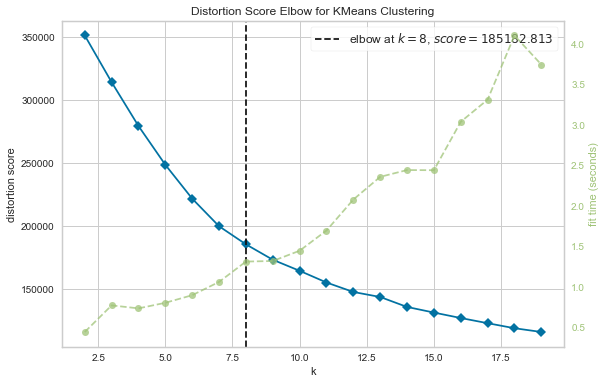

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [151]:
plt.rcParams["figure.figsize"] = (9,6)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X_trans_0)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [161]:
# Best number of clusters with davies
startt = time.time()

davies_ad_0 = []

K_range = range(3, 18)
for k in K_range:
    
    cls_ad_0 = cluster.KMeans(n_clusters=k)
    cls_ad_0.fit(X_trans_0)
    dav_ad_0 = metrics.davies_bouldin_score(X_trans_0, cls_ad_0.labels_)
    davies_ad_0.append(dav_ad_0)
    
    #print(k)
    
endt = time.time()
print("total time: ",(endt - startt),"sec")

total time:  24.431675910949707 sec


Text(0, 0.5, 'davies_bouldin')

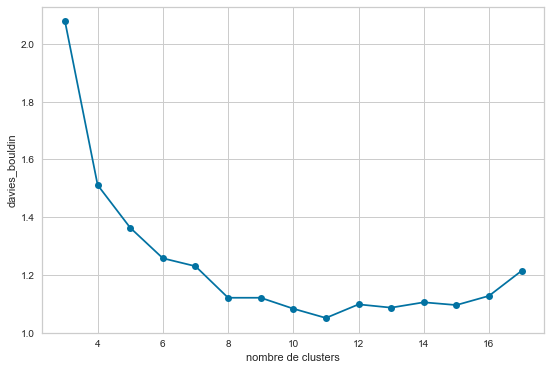

In [162]:
plt.plot(K_range, davies_ad_0, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('davies_bouldin')

In [165]:
# Best number of clusters
startt = time.time()

silhouette_ad_0 = []

K_range = range(5, 14)
for k in K_range:
    
    cls_ad_0 = cluster.KMeans(n_clusters=k)
    cls_ad_0.fit(X_trans_0)
    silh_ad_0 = metrics.silhouette_score(X_trans_0, cls_ad_0.labels_)
    silhouette_ad_0.append(silh_ad_0)
    
    #print(k)
    
endt = time.time()
print("total time: ",(endt - startt),"sec")

total time:  73.38448762893677 sec


Text(0, 0.5, 'silhouette')

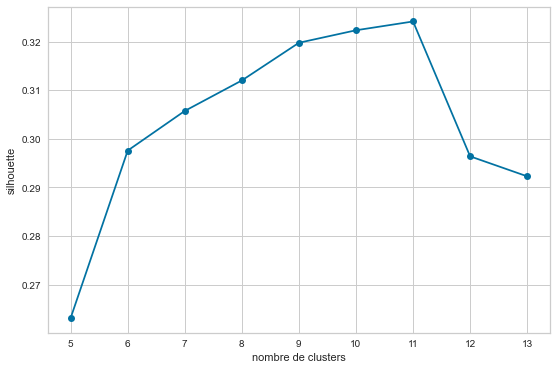

In [167]:
plt.plot(K_range, silhouette_ad_0, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('silhouette')

In [32]:
model_df0 = KMeans(n_clusters=9)
model_df0.fit(X_trans_0)
model_df0.labels_

df0['cluster'] = model_df0.labels_

In [33]:
df0['Number_of_orders'].value_counts()

1    43548
2     1149
3       80
4       14
5        5
9        1
6        1
Name: Number_of_orders, dtype: int64

In [34]:
df0['cluster'].value_counts()

7    13777
5     8000
3     6967
1     4648
4     3764
0     3042
2     3041
6     1051
8      508
Name: cluster, dtype: int64

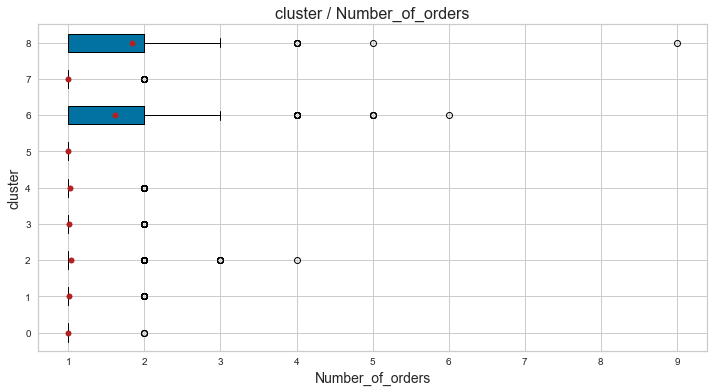

                  sum_sq       df           F  PR(>F)
C(catquali)   716.747071      8.0  3994.84004     0.0
Residual     1004.495306  44789.0         NaN     NaN


In [35]:
boxplots(df0, 'cluster', 'Number_of_orders', tukey=0, size=(12,6), showfliers=True, sort = 1, font=12)

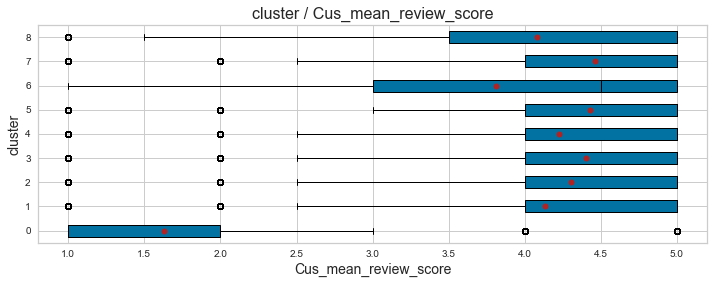

                   sum_sq       df            F  PR(>F)
C(catquali)  21988.254041      8.0  2537.956289     0.0
Residual     48505.165092  44789.0          NaN     NaN


In [36]:
boxplots(df0, 'cluster', 'Cus_mean_review_score', tukey=0, size=(12,4), showfliers=True, sort = 1, font=12)

In [37]:
df0['cluster'].unique()

array([3, 4, 0, 7, 8, 1, 6, 5, 2])

In [206]:
selection = ['Cus_mean_review_score', 'Number_of_orders', 'Recency', 'Number_of_articles', 'log_Spending',
             'cool_stuff', 'pet_shop', 'home_confort', 'health_beauty', 'electronics',
             'industry_commerce_construction', 'arts_video_audio', 'clothing_and_bags', 'auto',
             'MUM_of_payment_a', 'delay_delivery', 'distance']

In [209]:
polarplt(df0, 'cluster', selection)

<a id='df1' />

### t1 = t0 + 1 month

In [91]:
df1 = transforming(df1)

(65769, 78)
----------
(52779, 78)
----------
(52779, 79)
----------
(51514, 17)


In [92]:
df1_fr = transformag(df1)

----------
[0.11231328 0.19186971 0.26603035 0.33681215 0.40294414 0.46666903
 0.5296189  0.59152515 0.65280841 0.71259236 0.77211179 0.8301619
 0.88307171 0.92520113 0.96564811 0.99848321 1.        ]
--------------------
--------------------


In [93]:
pca1 = decomposition.PCA(n_components=7)
pca1.fit(df1_fr)
print(pca1.explained_variance_ratio_.cumsum())
X_trans_1 = pca1.transform(df1_fr)

[0.11231328 0.19186971 0.26603035 0.33681215 0.40294414 0.46666903
 0.5296189 ]


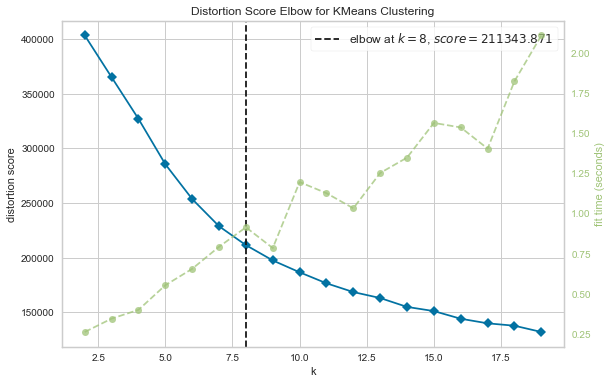

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
plt.rcParams["figure.figsize"] = (9,6)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X_trans_1)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [95]:
# Best number of clusters with davies
startt = time.time()

davies_ad_1 = []

K_range = range(3, 18)
for k in K_range:
    
    cls_ad_1 = cluster.KMeans(n_clusters=k)
    cls_ad_1.fit(X_trans_1)
    dav_ad_1 = metrics.davies_bouldin_score(X_trans_1, cls_ad_1.labels_)
    davies_ad_1.append(dav_ad_1)
    
    #print(k)
    
endt = time.time()
print("total time: ",(endt - startt),"sec")

total time:  16.3523690700531 sec


Text(0, 0.5, 'davies_bouldin')

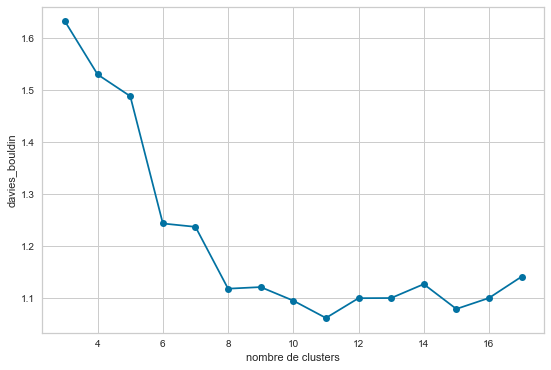

In [96]:
plt.plot(K_range, davies_ad_1, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('davies_bouldin')

In [97]:
# Best number of clusters
startt = time.time()

silhouette_ad_1 = []

K_range = range(5, 14)
for k in K_range:
    
    cls_ad_1 = cluster.KMeans(n_clusters=k)
    cls_ad_1.fit(X_trans_1)
    silh_ad_1 = metrics.silhouette_score(X_trans_1, cls_ad_1.labels_)
    silhouette_ad_1.append(silh_ad_1)
    
    #print(k)
    
endt = time.time()
print("total time: ",(endt - startt),"sec")

total time:  226.1276798248291 sec


Text(0, 0.5, 'silhouette')

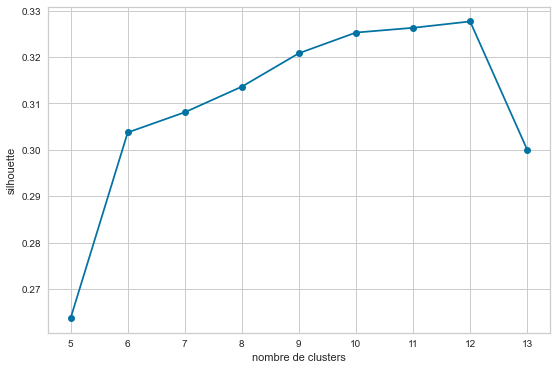

In [98]:
plt.plot(K_range, silhouette_ad_1, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('silhouette')

In [116]:
model_df1 = KMeans(n_clusters=9)
model_df1.fit(X_trans_1)
model_df1.labels_

df1['cluster_t1'] = model_df1.labels_

In [117]:
df1['cluster_t1'].value_counts()

1    15583
8     9085
4     7650
6     5776
5     4607
0     3621
7     3410
3     1182
2      600
Name: cluster_t1, dtype: int64

In [210]:
polarplt(df1, 'cluster_t1', selection)

#### prediction with M0 model (trained at t0 with t0 dataframe {F0})

In [119]:
df1['cluster_M0'] = model_df0.predict(X_trans_1)

In [211]:
polarplt(df1, 'cluster_M0', selection)

In [122]:
Ari_01 = adjusted_rand_score(df1['cluster_t1'], df1['cluster_M0'])
Ari_01

0.9288137950574238

<a id='df2' />

### t2 = t0 + 3 months

In [99]:
df2 = transforming(df2)

(82183, 78)
----------
(66066, 78)
----------
(66066, 79)
----------
(64411, 17)


In [100]:
df2_fr = transformag(df2)

----------
[0.11237804 0.19703383 0.2710954  0.34199815 0.40834627 0.47147937
 0.53428441 0.59657895 0.65822671 0.71820945 0.77783202 0.83580081
 0.88708051 0.92849179 0.9666174  0.9985879  1.        ]
--------------------
--------------------


In [101]:
pca2 = decomposition.PCA(n_components=7)
pca2.fit(df2_fr)
print(pca2.explained_variance_ratio_.cumsum())
X_trans_2 = pca2.transform(df2_fr)

[0.11237804 0.19703383 0.2710954  0.34199815 0.40834627 0.47147937
 0.53428441]


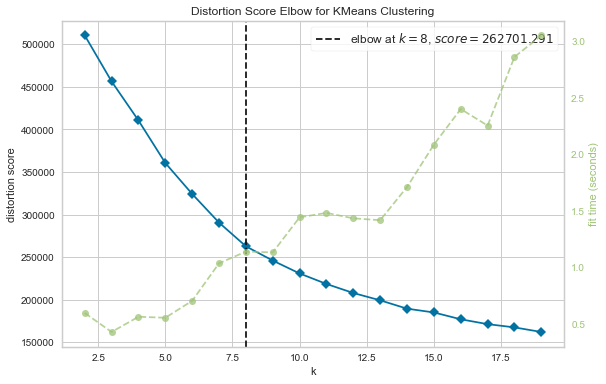

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [102]:
plt.rcParams["figure.figsize"] = (9,6)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X_trans_2)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [103]:
# Best number of clusters with davies
startt = time.time()

davies_ad_2 = []

K_range = range(3, 18)
for k in K_range:
    
    cls_ad_2 = cluster.KMeans(n_clusters=k)
    cls_ad_2.fit(X_trans_2)
    dav_ad_2 = metrics.davies_bouldin_score(X_trans_2, cls_ad_2.labels_)
    davies_ad_2.append(dav_ad_2)
    
    #print(k)
    
endt = time.time()
print("total time: ",(endt - startt),"sec")

total time:  19.82797908782959 sec


Text(0, 0.5, 'davies_bouldin')

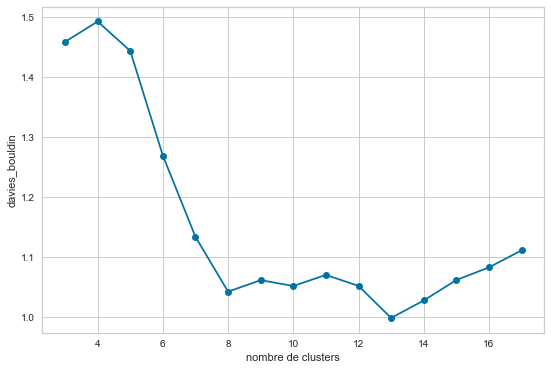

In [104]:
plt.plot(K_range, davies_ad_2, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('davies_bouldin')

In [105]:
# Best number of clusters
startt = time.time()

silhouette_ad_2 = []

K_range = range(5, 14)
for k in K_range:
    
    cls_ad_2 = cluster.KMeans(n_clusters=k)
    cls_ad_2.fit(X_trans_2)
    silh_ad_2 = metrics.silhouette_score(X_trans_2, cls_ad_2.labels_)
    silhouette_ad_2.append(silh_ad_2)
    
    #print(k)
    
endt = time.time()
print("total time: ",(endt - startt),"sec")

total time:  358.4819037914276 sec


Text(0, 0.5, 'silhouette')

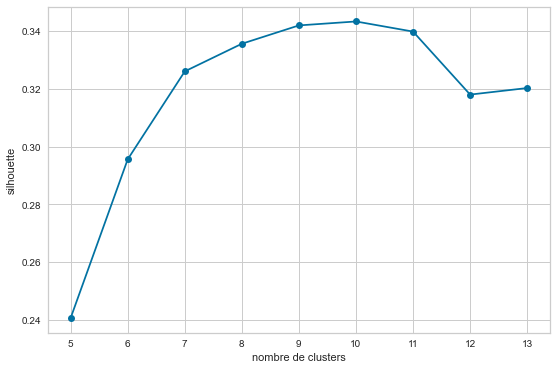

In [106]:
plt.plot(K_range, silhouette_ad_2, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('silhouette')

In [123]:
model_df2 = KMeans(n_clusters=9)
model_df2.fit(X_trans_2)
model_df2.labels_

df2['cluster_t2'] = model_df2.labels_

In [124]:
df2['cluster_t2'].value_counts()

0    19871
7    11629
6     9041
1     6645
3     6011
2     4849
5     4160
8     1458
4      747
Name: cluster_t2, dtype: int64

In [125]:
df2['cluster_M0'] = model_df0.predict(X_trans_2)

In [126]:
Ari_02 = adjusted_rand_score(df2['cluster_t2'], df2['cluster_M0'])
Ari_02

0.8872556073100312

In [214]:
polarplt(df2, 'cluster_t2', selection)

In [215]:
polarplt(df2, 'cluster_M0', selection)

<a id='df3' />

### t3 = t0 + 6 months

In [108]:
df3 = transforming(df3)

(104813, 78)
----------
(84324, 78)
----------
(84324, 79)
----------
(82332, 17)


In [109]:
df3_fr = transformag(df3)

----------
[0.11246748 0.18968295 0.26340296 0.334127   0.40066688 0.4649461
 0.52795807 0.5901392  0.65188383 0.71259311 0.77224727 0.83017083
 0.88391928 0.92568221 0.96687368 0.99880276 1.        ]
--------------------
--------------------


In [115]:
pca3 = decomposition.PCA(n_components=7)
pca3.fit(df3_fr)
print(pca3.explained_variance_ratio_.cumsum())
X_trans_3 = pca3.transform(df3_fr)

[0.11246748 0.18968295 0.26340296 0.334127   0.40066688 0.4649461
 0.52795807]


In [111]:
# Best number of clusters with davies
startt = time.time()

davies_ad_3 = []

K_range = range(3, 18)
for k in K_range:
    
    cls_ad_3 = cluster.KMeans(n_clusters=k)
    cls_ad_3.fit(X_trans_3)
    dav_ad_3 = metrics.davies_bouldin_score(X_trans_3, cls_ad_3.labels_)
    davies_ad_3.append(dav_ad_3)
    
    #print(k)
    
endt = time.time()
print("total time: ",(endt - startt),"sec")

total time:  25.064398288726807 sec


Text(0, 0.5, 'davies_bouldin')

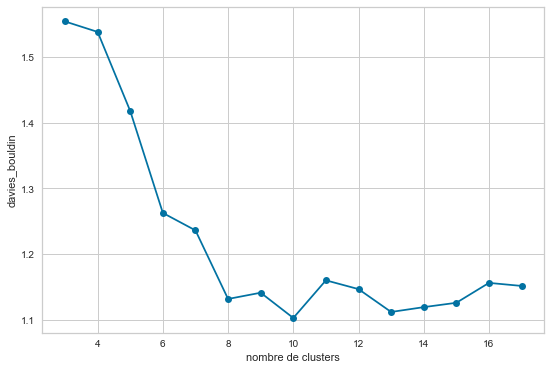

In [112]:
plt.plot(K_range, davies_ad_3, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('davies_bouldin')

In [113]:
# Best number of clusters
startt = time.time()

silhouette_ad_3 = []

K_range = range(5, 14)
for k in K_range:
    
    cls_ad_3 = cluster.KMeans(n_clusters=k)
    cls_ad_3.fit(X_trans_3)
    silh_ad_3 = metrics.silhouette_score(X_trans_3, cls_ad_3.labels_)
    silhouette_ad_3.append(silh_ad_3)
    
    #print(k)
    
endt = time.time()
print("total time: ",(endt - startt),"sec")

total time:  618.025447845459 sec


Text(0, 0.5, 'silhouette')

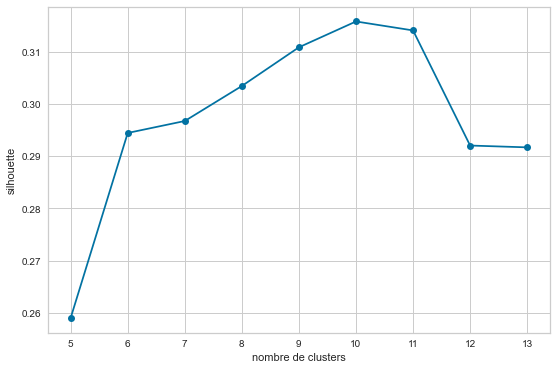

In [114]:
plt.plot(K_range, silhouette_ad_3, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('silhouette')

In [127]:
model_df3 = KMeans(n_clusters=9)
model_df3.fit(X_trans_3)
model_df3.labels_

df3['cluster_t3'] = model_df3.labels_

In [128]:
df3['cluster_t3'].value_counts()

1    20571
7    15086
6    11594
2     8960
5     8717
4     7836
8     6207
0     1806
3     1555
Name: cluster_t3, dtype: int64

In [130]:
df3['cluster_M0'] = model_df0.predict(X_trans_3)

In [148]:
adjusted_rand_score(df3['cluster_t3'], df3['cluster_M0'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning:

overflow encountered in longlong_scalars



-1.493859299608148

In [151]:
df3.shape

(82332, 19)

In [188]:
max_ari = df3.sample(n=75562)

In [189]:
adjusted_rand_score(test['cluster_t3'], test['cluster_M0'])

0.6286037269077777

In [191]:
aridf3 = 0
itera = 50

for i in range(itera) :
    max_ari_samples = df3.sample(n=75562)
    max_ari_result = adjusted_rand_score(test['cluster_t3'], test['cluster_M0'])
    aridf3 += max_ari_result
    
ari_result = aridf3/itera
ari_result

0.6286037269077773

In [217]:
polarplt(df3, 'cluster_t3', selection)

In [218]:
polarplt(df3, 'cluster_M0', selection)

<a id='Ari' />

# Part 4 - Ari Score

Text(0, 0.5, 'Score')

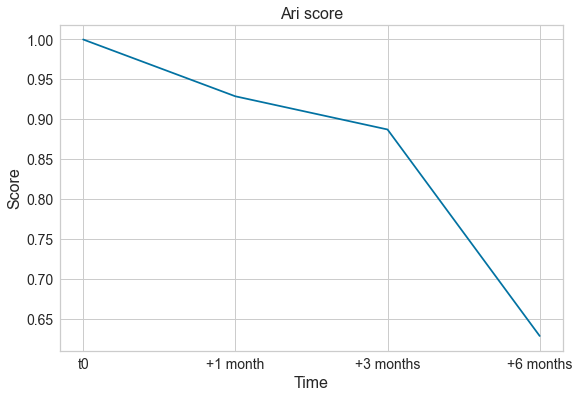

In [199]:
ari1 = 0.8872556073100312+(0.9288137950574238-0.8872556073100312)/2
ari2 = 0.6286037269077773+2*(0.8872556073100312-0.6286037269077773)/3
ari3 = 0.6286037269077773+(0.8872556073100312-0.6286037269077773)/3

ari_time = ['t0', '+1 month', '', '+3 months', ' ', '  ', '+6 months']
ari_tab = [1, 0.9288137950574238, ari1, 0.8872556073100312, ari2, ari3, 0.6286037269077773]



fig = plt.figure(figsize=(7,5))
ax = plt.axes()

ax.plot(ari_time, ari_tab)
plt.title('Ari score', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Score', fontsize=16)
plt.grid(visible=True, alpha=0.6)